<a href="https://colab.research.google.com/github/Suchitra90/My_python_projects/blob/main/Wallmart_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore',ConvergenceWarning)

In [ ]:
# Import the dataset
df = pd.read_csv('/content/drive/MyDrive/Walmart.csv')

In [ ]:
# Read the dataset
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
# check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# Converting the data type of ddate column to datetime
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


1.a.If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

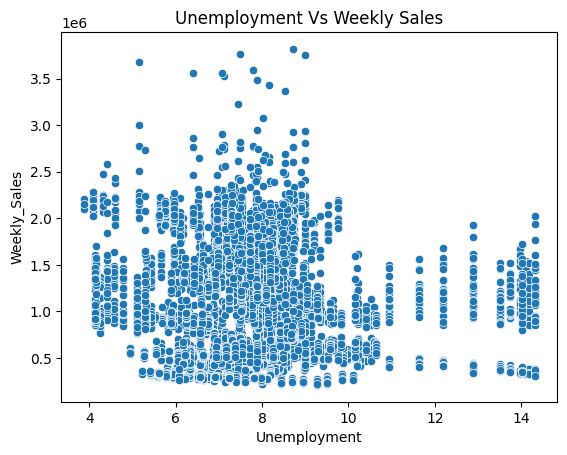

In [ ]:
# Relationship between unemployment rate and weekly sales
sns.scatterplot(x=df['Unemployment'],y=df['Weekly_Sales'],data=df)
plt.title('Unemployment Vs Weekly Sales')
plt.show()

In [ ]:
# Finding the overall correlation between weekly sales and unemployment
correlation = df['Weekly_Sales'].corr(df['Unemployment'])
correlation

np.float64(-0.10617608965795429)

In [ ]:
# Store wise correlation for weekly sales and unemployment
Store_corr = df.groupby('Store').apply(lambda x:x['Weekly_Sales'].corr(x['Unemployment'])).reset_index()
Store_corr.columns = ['Store','Sales_Unemployment_correlation']
Store_corr = Store_corr.sort_values(by='Sales_Unemployment_correlation').reset_index()
Store_corr.head()

,index,Store,Sales_Unemployment_correlation
0,37,38,-0.785290
1,43,44,-0.780076
2,38,39,-0.384681
3,41,42,-0.356355
4,40,41,-0.350630


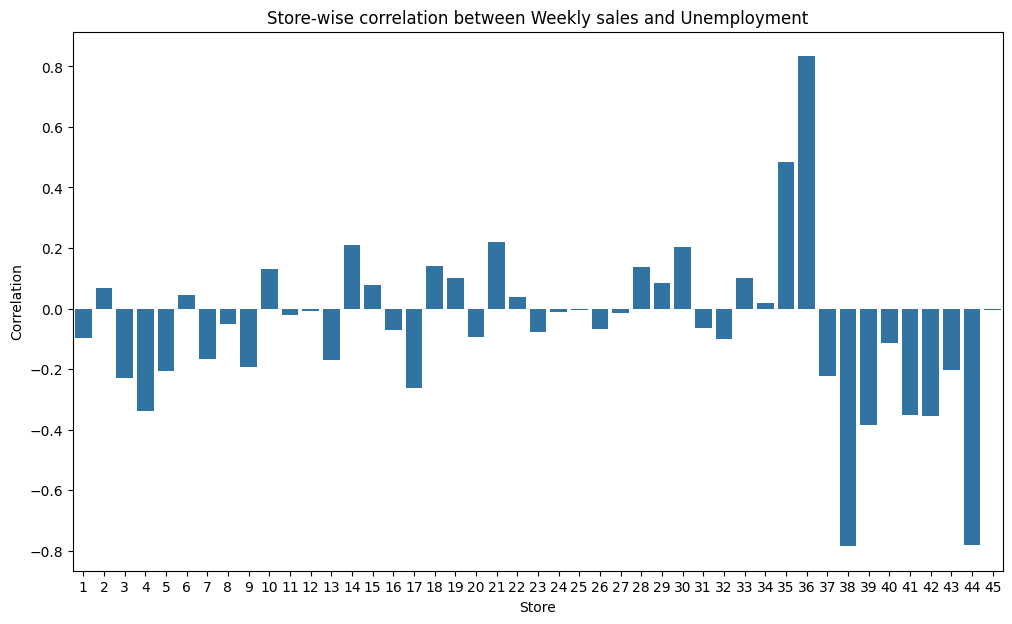

In [ ]:
# Plot the graph for store wise correlation between sales and unemployment
plt.figure(figsize=(12,7))
sns.barplot(x='Store',y='Sales_Unemployment_correlation',data=Store_corr)
plt.title('Store-wise correlation between Weekly sales and Unemployment')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.show()

We can say that store-38 is suffering mostly as the unemployment increases the weekly sales has been reduced

1.b.If the weekly sales show a seasonal trend, when and what could be the reason?

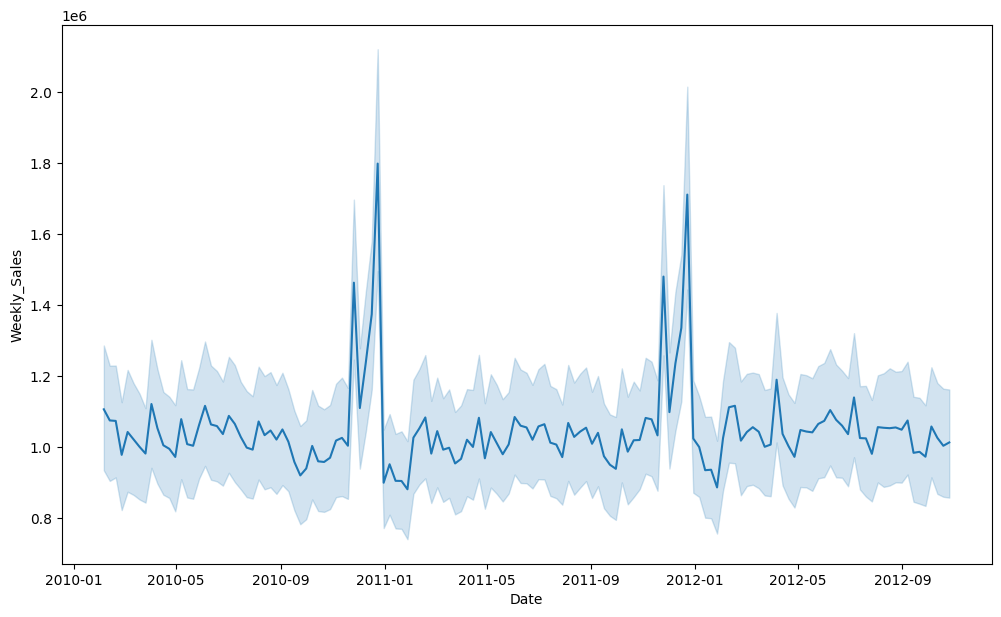

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(x='Date',y='Weekly_Sales',data=df)
plt.show()

In [ ]:
df_season = df[['Date','Weekly_Sales']]
df_season.set_index('Date',inplace=True)
df_season = df_season.groupby(pd.Grouper(freq='M')).sum()
df_season

,Weekly_Sales
Date,
2010-02-28,1.903330e+08
2010-03-31,1.819198e+08
2010-04-30,2.314124e+08
2010-05-31,1.867109e+08
2010-06-30,1.922462e+08
2010-07-31,2.325801e+08
2010-08-31,1.876401e+08
2010-09-30,1.772679e+08
2010-10-31,2.171618e+08


<Figure size 1500x600 with 0 Axes>

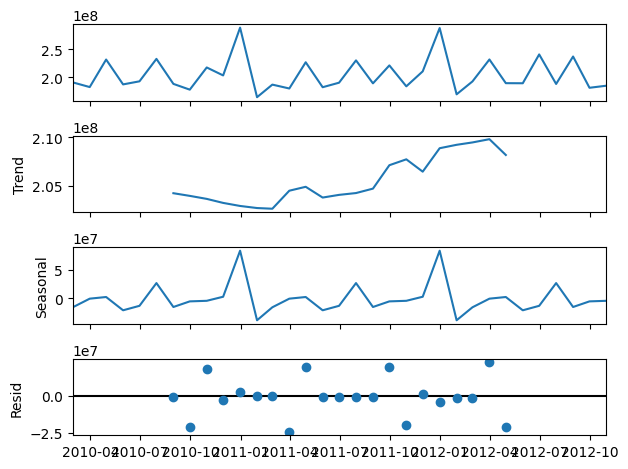

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(15,6))
decomposed = seasonal_decompose(df_season)
decomposed.plot();

From the above plot we can say that at the end of the year (mostly November and December) there is increase in sales and It can be because of the festivals like Christmas or Holidays

1.c.Does temperature affect the weekly sales in any manner?

In [ ]:
Temp_corr = df['Weekly_Sales'].corr(df['Temperature'])
Temp_corr

np.float64(-0.06381001317946956)

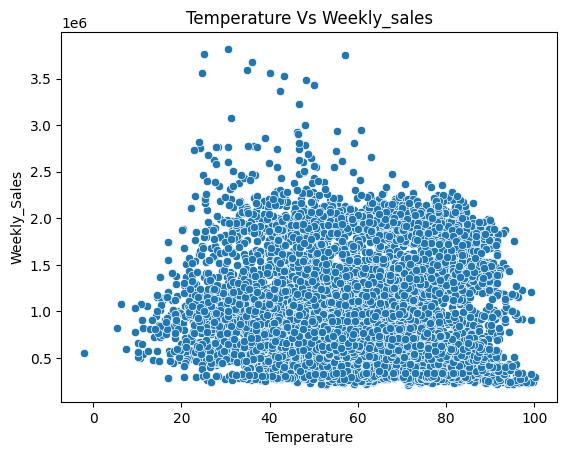

In [ ]:
sns.scatterplot(x='Temperature',y='Weekly_Sales',data=df)
plt.title('Temperature Vs Weekly_sales')
plt.show()

Yes,Temperature and sales are related but with a minimum effect. From the above value we can say that Temperature and Sales are inversely related i.e. as Temperature increases weekly sales are decreases.

If Temperature increases then 0.06 times weekly sales decreases

1.d.How is the Consumer Price index affecting the weekly sales of various stores?

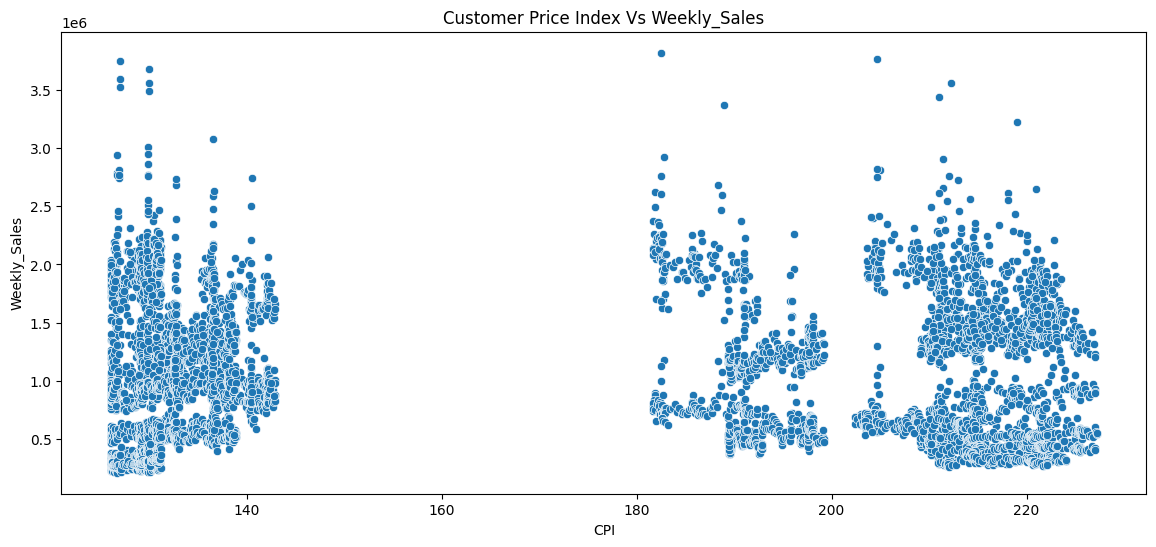

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='CPI',y='Weekly_Sales',data=df)
plt.title('Customer Price Index Vs Weekly_Sales')
plt.show()

From the graph we can say that

Customer Index < 140 is less sales,

Customer Index 140-180 is no sales,

Customer Index >200 is more sales

1.e.Top performing stores according to the historical data.

In [ ]:
top_stores = df.groupby('Store')['Weekly_Sales'].sum().reset_index().sort_values(by='Weekly_Sales',ascending=False)
top_stores.head()

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


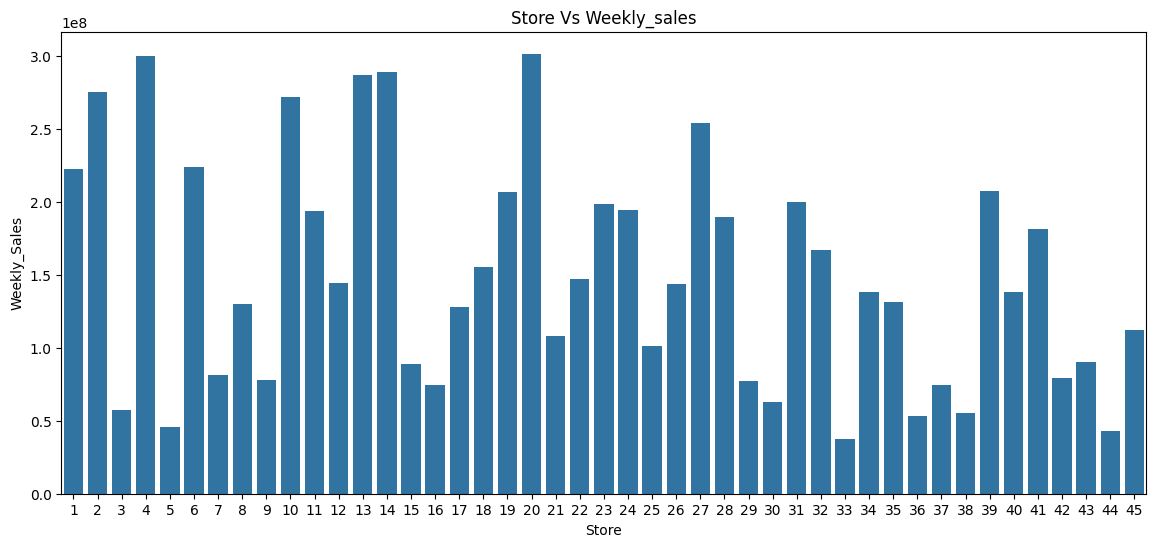

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x='Store',y='Weekly_Sales',data=top_stores)
plt.title('Store Vs Weekly_sales')
plt.show()

1.f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [ ]:
sales = df.groupby('Store')['Weekly_Sales'].sum()

In [ ]:
worst = sales.tail(1)
best = sales.head(1)
diff = best.values[0] - worst.values[0]

In [ ]:
print('Worst performing store is',worst.values[0])
print('Best performing store is',best.values[0])
print('Differences',diff)

Worst performing store is 112395341.42
Best performing store is 222402808.85
Differences 110007467.42999999


Store 33 is the worst performing store as it's weekly sale is low compared to all the stores.

Difference between the highest and lowest performing store is 264237570.49999997

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df['Store'].nunique()

45

In [ ]:
# Let us check for one store first
store_10 = df[df['Store'] == 10]
store_10

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1287,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765
1288,10,2010-02-12,2176028.52,1,49.96,2.828,126.496258,9.765
1289,10,2010-02-19,2113432.58,0,58.22,2.915,126.526286,9.765
1290,10,2010-02-26,2006774.96,0,52.77,2.825,126.552286,9.765
1291,10,2010-03-05,1987090.09,0,55.92,2.877,126.578286,9.765
...,...,...,...,...,...,...,...,...
1425,10,2012-09-28,1694862.41,0,82.52,3.966,131.043000,7.170
1426,10,2012-10-05,1758971.38,0,80.88,4.132,131.075667,6.943
1427,10,2012-10-12,1713889.11,0,76.03,4.468,131.108333,6.943
1428,10,2012-10-19,1734834.82,0,72.71,4.449,131.149968,6.943


In [ ]:
# Considering only date and weekly sales columns and sort by date
store_10 = store_10[['Date','Weekly_Sales']]
store_10.sort_values(by='Date',inplace=True)
store_10

,Date,Weekly_Sales
1287,2010-02-05,2193048.75
1288,2010-02-12,2176028.52
1289,2010-02-19,2113432.58
1290,2010-02-26,2006774.96
1291,2010-03-05,1987090.09
...,...,...
1425,2012-09-28,1694862.41
1426,2012-10-05,1758971.38
1427,2012-10-12,1713889.11
1428,2012-10-19,1734834.82


In [ ]:
# Set the date as index
store_10.set_index('Date',drop=True,inplace=True)
store_10

,Weekly_Sales
Date,
2010-02-05,2193048.75
2010-02-12,2176028.52
2010-02-19,2113432.58
2010-02-26,2006774.96
2010-03-05,1987090.09
...,...
2012-09-28,1694862.41
2012-10-05,1758971.38
2012-10-12,1713889.11


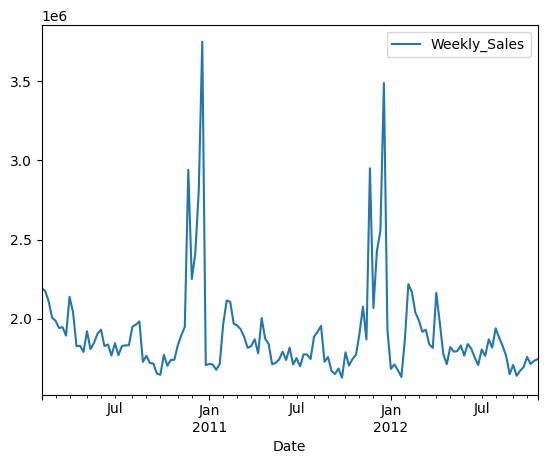

In [ ]:
# Let's plot the dataset
store_10.plot()
plt.show()

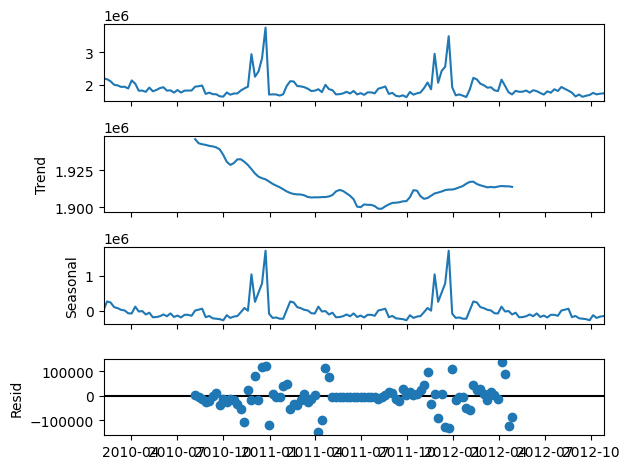

In [ ]:
# Let's check for Trend,seasonal,Residual by using seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(store_10)
decomposed.plot();

In [ ]:
# Check for stationarity of data
from statsmodels.tsa.stattools import adfuller

results = adfuller(store_10)
p_value = results[1]
if p_value < 0.05:
  print('Data is Stationay no need of any transformation')
else:
  print('Data is not Stationay and need to perfrom transformation')

Data is Stationay no need of any transformation


In [ ]:
# Split the data for training and testing
store_10_train = store_10[:114]
store_10_test = store_10[114:]

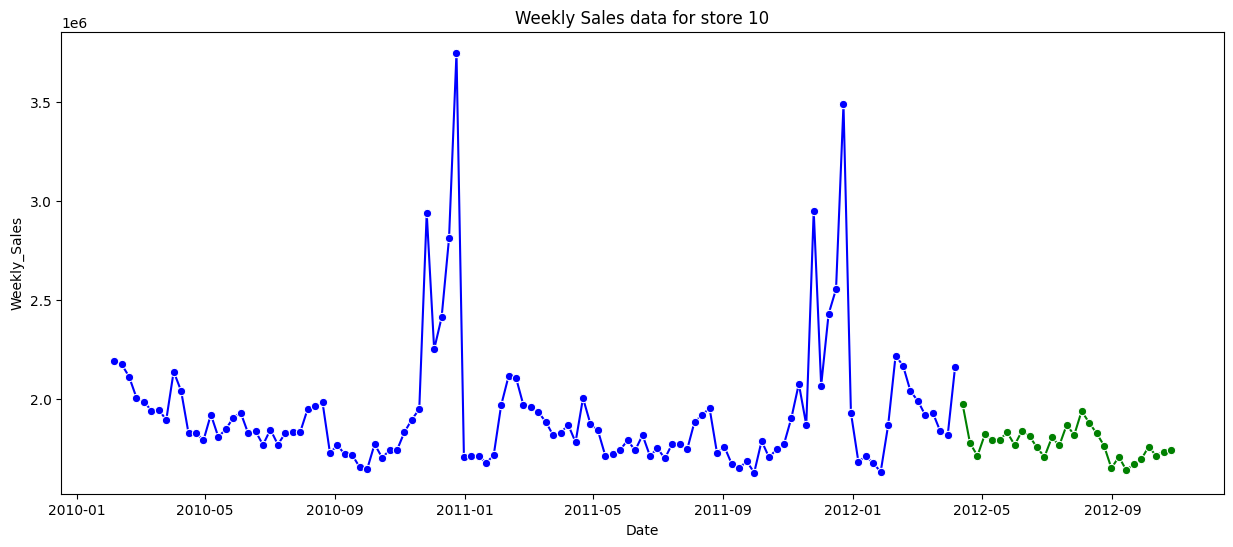

In [ ]:
# Plot the train and test data
plt.figure(figsize=(15,6))
sns.lineplot(data=store_10_train,x='Date',y='Weekly_Sales',marker='o',color='blue')
sns.lineplot(data=store_10_test,x='Date',y='Weekly_Sales',marker='o',color='green')
plt.title('Weekly Sales data for store 10')
plt.show()

In [ ]:
# Claculation of (p,d,q) values
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
p = range(0,6)
d = range(0,1)
q = range(0,6)

pdq = list(itertools.product(p,d,q))
rmse = []
order = []

for i in pdq:
  model = ARIMA(store_10_train,order=i)
  model_fit = model.fit()
  y_pred = model_fit.predict(start = len(store_10_train),end=len(store_10)-1)
  error = np.sqrt(mean_squared_error(store_10_test,y_pred))
  order.append(i)
  rmse.append(error)

results = pd.DataFrame(data=rmse,columns=['RMSE'],index=order)

In [ ]:
results.sort_values(by='RMSE',ascending=False)

,RMSE
"(2, 0, 1)",175519.714018
"(1, 0, 2)",175338.579865
"(2, 0, 0)",175327.618280
"(1, 0, 1)",175249.355623
"(1, 0, 0)",173750.431514
"(2, 0, 2)",173170.181677
"(0, 0, 2)",172946.187404
"(0, 0, 0)",170398.657557
"(0, 0, 1)",170368.046937


In [ ]:
# Model Building
model = ARIMA(store_10,order=(2,0,1))
model = model.fit()

,predicted_mean
2012-04-13,1.998574e+06
2012-04-20,1.960100e+06
2012-04-27,1.861535e+06
2012-05-04,1.809369e+06
2012-05-11,1.843335e+06
2012-05-18,1.842336e+06
2012-05-25,1.841697e+06
2012-06-01,1.856665e+06
2012-06-08,1.834439e+06
2012-06-15,1.858014e+06


In [ ]:
Future_forecast = model.forecast(steps=12)
Future_forecast

,predicted_mean
2012-11-02,1.812082e+06
2012-11-09,1.841659e+06
2012-11-16,1.862093e+06
2012-11-23,1.875223e+06
2012-11-30,1.883742e+06
2012-12-07,1.889262e+06
2012-12-14,1.892839e+06
2012-12-21,1.895157e+06
2012-12-28,1.896659e+06
2013-01-04,1.897632e+06


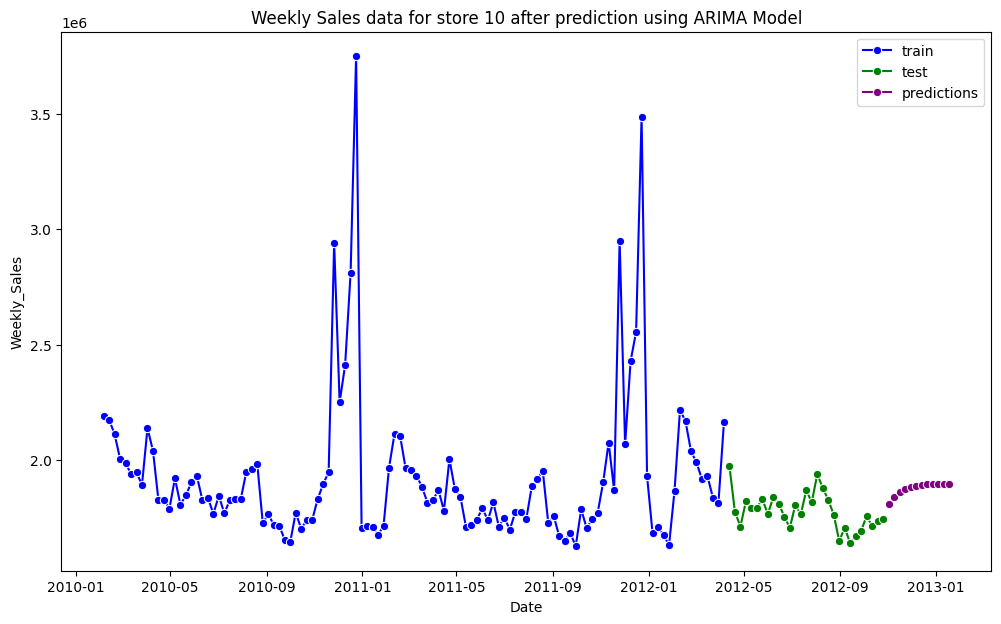

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(data=store_10_train,x='Date',y='Weekly_Sales',marker='o',color='blue',label='train')
sns.lineplot(data=store_10_test,x='Date',y='Weekly_Sales',marker='o',color='green',label='test')
sns.lineplot(x=Future_forecast.index,y=Future_forecast.values,marker='o',color='purple',label='predictions')
plt.title('Weekly Sales data for store 10 after prediction using ARIMA Model')
plt.show()

In [ ]:
# SARIMAX Model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(store_10,order=(2,0,1),seasonal_order=(2,0,1,52))
model = model.fit()
y_pred = model.predict(start=len(store_10_train),end=len(store_10)-1)
y_pred

,predicted_mean
2012-04-13,1.956630e+06
2012-04-20,2.039903e+06
2012-04-27,1.795061e+06
2012-05-04,1.782927e+06
2012-05-11,1.759553e+06
2012-05-18,1.790059e+06
2012-05-25,1.803443e+06
2012-06-01,1.845319e+06
2012-06-08,1.766362e+06
2012-06-15,1.866589e+06


In [ ]:
Future_forecast = model.forecast(steps=12)
Future_forecast

,predicted_mean
2012-11-02,1.860358e+06
2012-11-09,1.984947e+06
2012-11-16,1.858740e+06
2012-11-23,2.559629e+06
2012-11-30,1.992096e+06
2012-12-07,2.224916e+06
2012-12-14,2.307910e+06
2012-12-21,2.910790e+06
2012-12-28,1.901938e+06
2013-01-04,1.743591e+06


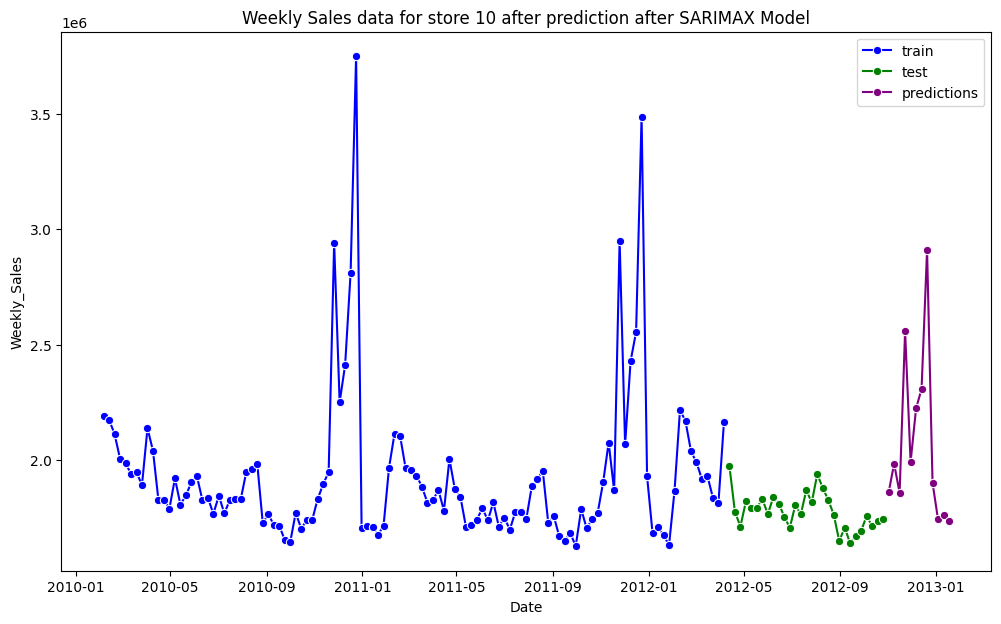

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(data=store_10_train,x='Date',y='Weekly_Sales',marker='o',color='blue',label='train')
sns.lineplot(data=store_10_test,x='Date',y='Weekly_Sales',marker='o',color='green',label='test')
sns.lineplot(x=Future_forecast.index,y=Future_forecast.values,marker='o',color='purple',label='predictions')
plt.title('Weekly Sales data for store 10 after prediction after SARIMAX Model')
plt.show()

In [ ]:
# Create a function to predict the future values of data for different store
def Calculation_pdq(store_no):
  # Create a separate dataframe for store and set index as date
  store = df[df['Store'] == store_no]
  store = store[['Date','Weekly_Sales']]
  store.sort_values(by='Date',inplace=True)
  store.set_index('Date',drop=True,inplace=True)

  # Plot the dataset
  from statsmodels.tsa.seasonal import seasonal_decompose
  decomposed = seasonal_decompose(store)
  decomposed.plot();

  # Check for stationarity of data
  from statsmodels.tsa.stattools import adfuller

  results = adfuller(store)
  p_value = results[1]
  if p_value < 0.05:
    print('Data is Stationay no need of any transformation')
  else:
    print('Data is not Stationay and need to perfrom transformation')

  # Split the data for training and testing
  train_size = int(len(store)*0.8)
  store_train = store[:train_size]
  store_test = store[train_size:]

  # Calculate (p,q) values
  from statsmodels.graphics.tsaplots import plot_acf
  plot_acf(store);

  from statsmodels.graphics.tsaplots import plot_pacf
  plot_pacf(store);

  # If the data is stationary then consider d=0 or else perform differencing by using Differencing function
  # From the plots of ACF(q-value) and PACF(p-value) we can note the q and p values
  # Combining all the three values now perform model function to see the future 12 weeks predictions for both ARIMA and SARIMA models

In [ ]:
def Model(store_no,p,d,q):

  # Create a separate dataframe for store and set index as date
  store = df[df['Store'] == store_no]
  store = store[['Date','Weekly_Sales']]
  store.sort_values(by='Date',inplace=True)
  store.set_index('Date',drop=True,inplace=True)

  # Model Building - ARIMA
  from statsmodels.tsa.arima.model import ARIMA
  model1 = ARIMA(store,order=(p,d,q))
  model_ARIMA = model1.fit()

  # Model Building - SARIMA
  from statsmodels.tsa.statespace.sarimax import SARIMAX
  m = 52 # As the data is weekly we can see annual seasonality so consider m = 52
  model2 = SARIMAX(store,order=(p,d,q),seasonal_order=(p,d,q,m))
  model_SARIMA = model2.fit()

  # Predict the future 12 weeks for both ARIMA and SARIMA models
  future_forecast_ARIMA = model_ARIMA.forecast(steps=12)
  future_forecast_SARIMA = model_SARIMA.forecast(steps=12)

  # Plot the dataset along with future predicted values
  plt.figure(figsize=(15,6))
  sns.lineplot(data=store,x='Date',y='Weekly_Sales',marker='o',color='blue',label='Historical Data')
  sns.lineplot(x=future_forecast_ARIMA.index,y=future_forecast_ARIMA.values,marker='o',color='purple',label='ARIMA')
  sns.lineplot(x=future_forecast_SARIMA.index,y=future_forecast_SARIMA.values,marker='o',color='purple',label='SARIMA')
  plt.title('Forecast for store - ARIMA Vs SARIMA')
  plt.show()

Data is Stationay no need of any transformation


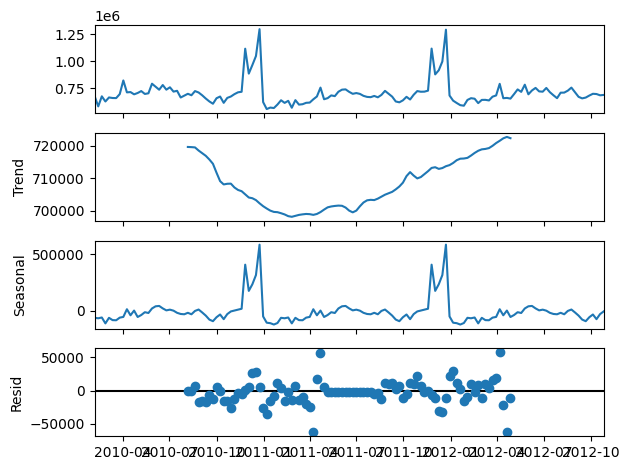

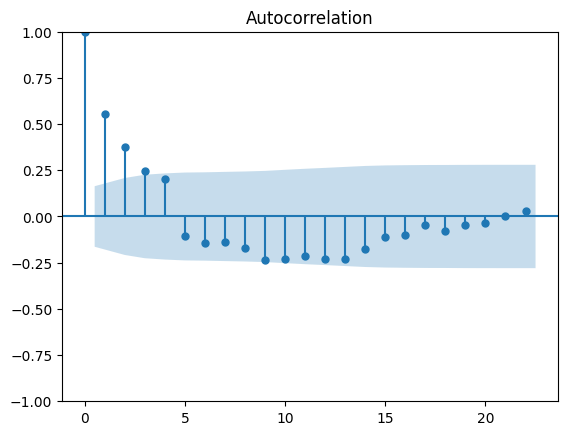

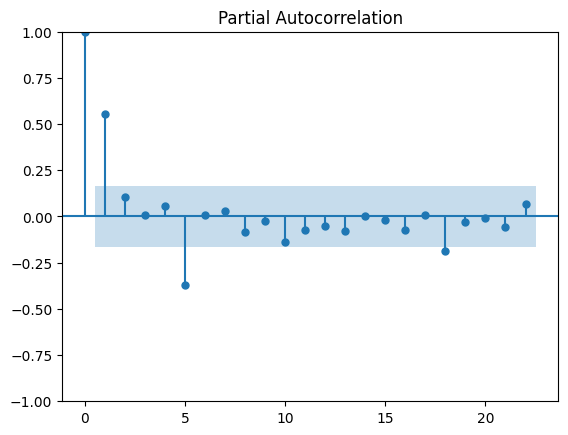

In [ ]:
Calculation_pdq(25)

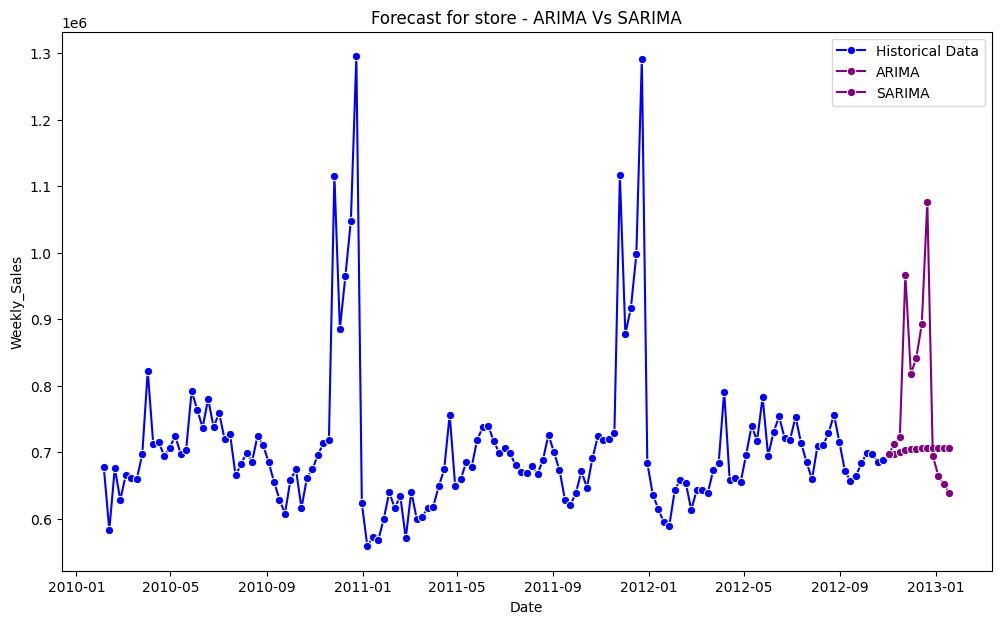

In [ ]:
Model(25,1,0,3)